In [16]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

In [17]:
with open('./out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CIVPART,RIMP,UNEMP,DOMINV,CPI,output
0,66.277333,-6.009871e+13,5.745333,2024.803843,3.608165,-1.385080e+14
1,66.237667,-5.891849e+13,5.928667,2033.970483,3.577646,-1.349086e+14
2,66.240667,-5.900694e+13,5.814000,2040.657373,3.444355,-1.359044e+14
3,66.228000,-5.863441e+13,5.732333,2059.384097,3.025183,-1.358153e+14
4,66.224667,-5.853676e+13,5.736333,2057.090557,2.318943,-1.355245e+14
5,66.214667,-1.183435e+14,5.720333,2110.509350,3.625050,-2.759996e+14
6,66.204333,-1.168631e+14,5.918333,2191.878843,3.651392,-2.734116e+14
7,66.204333,-1.169516e+14,5.834000,2197.071157,3.676269,-2.744779e+14
8,66.204333,-1.165791e+14,5.712667,2207.115363,3.415924,-2.748410e+14
9,66.204333,-1.164814e+14,5.633000,2214.181137,1.596315,-2.753916e+14


In [18]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

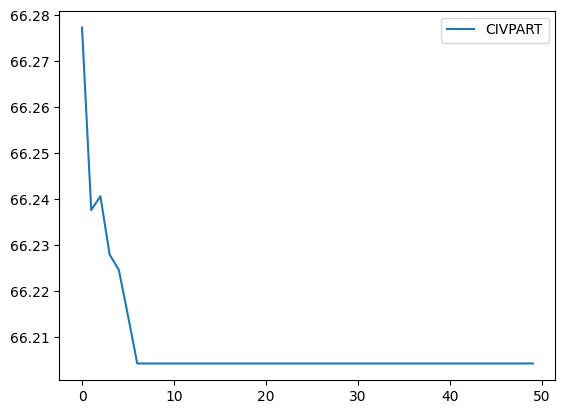

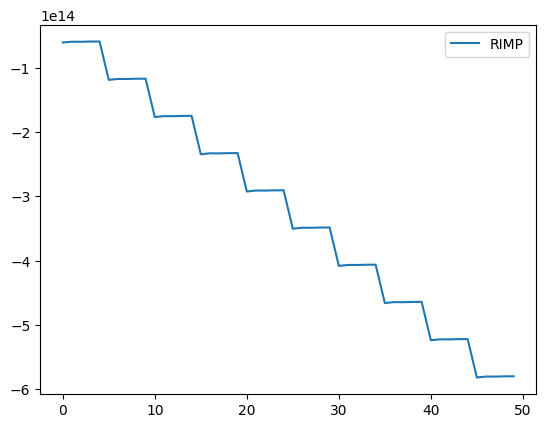

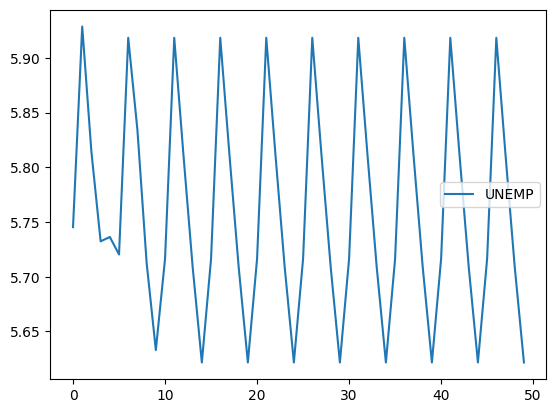

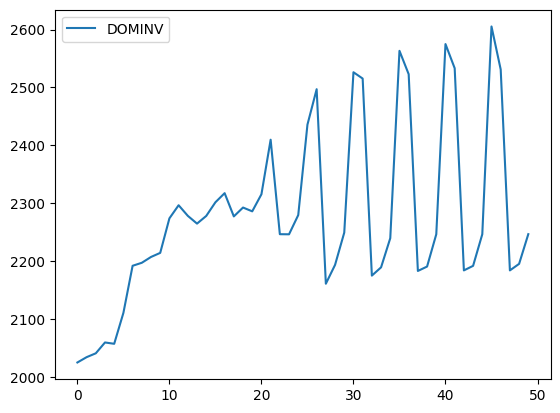

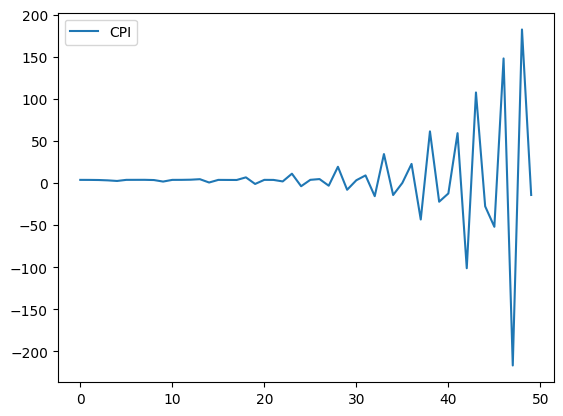

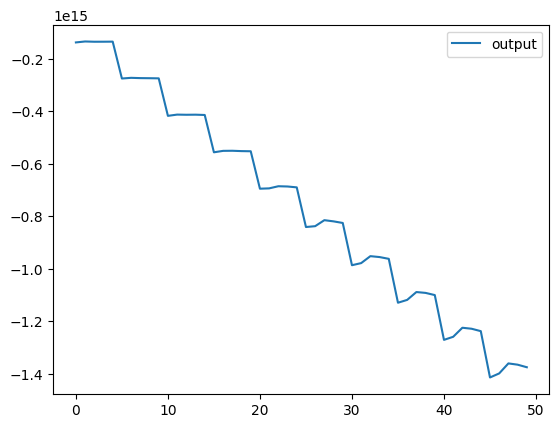

<Figure size 640x480 with 0 Axes>

In [19]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

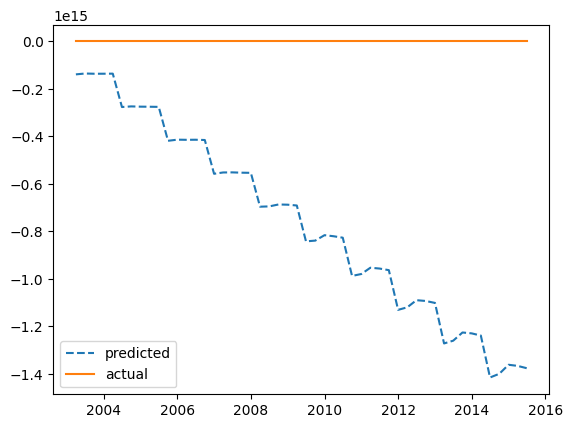

In [20]:
pred = df['output']
act = act.iloc[5:55]

pred.index = act.index

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [21]:
r2_score(act, pred)

-7.606757241902937e+23

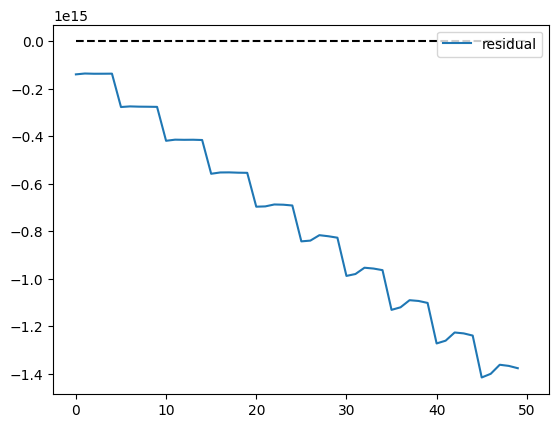

In [22]:
resid = (pred - act['RGDP']).reset_index(drop=True)
resid.plot(label='residual')
plt.hlines(0, 0, 50, linestyle='--', color='black')
plt.legend()
plt.show()